In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## Importing Datasets

In [4]:
fand = pd.read_csv("fandango_scrape.csv")

## Exploring Dataset Properties

In [6]:
fand.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [7]:
fand.describe()

,STARS,RATING,VOTES
count,504.000000,504.000000,504.000000
mean,3.558532,3.375794,1147.863095
std,1.563133,1.491223,3830.583136
min,0.000000,0.000000,0.000000
25%,3.500000,3.100000,3.000000
50%,4.000000,3.800000,18.500000
75%,4.500000,4.300000,189.750000
max,5.000000,5.000000,34846.000000


In [8]:
fand.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


Relationship between popularity of a film and its rating using scatterplot.

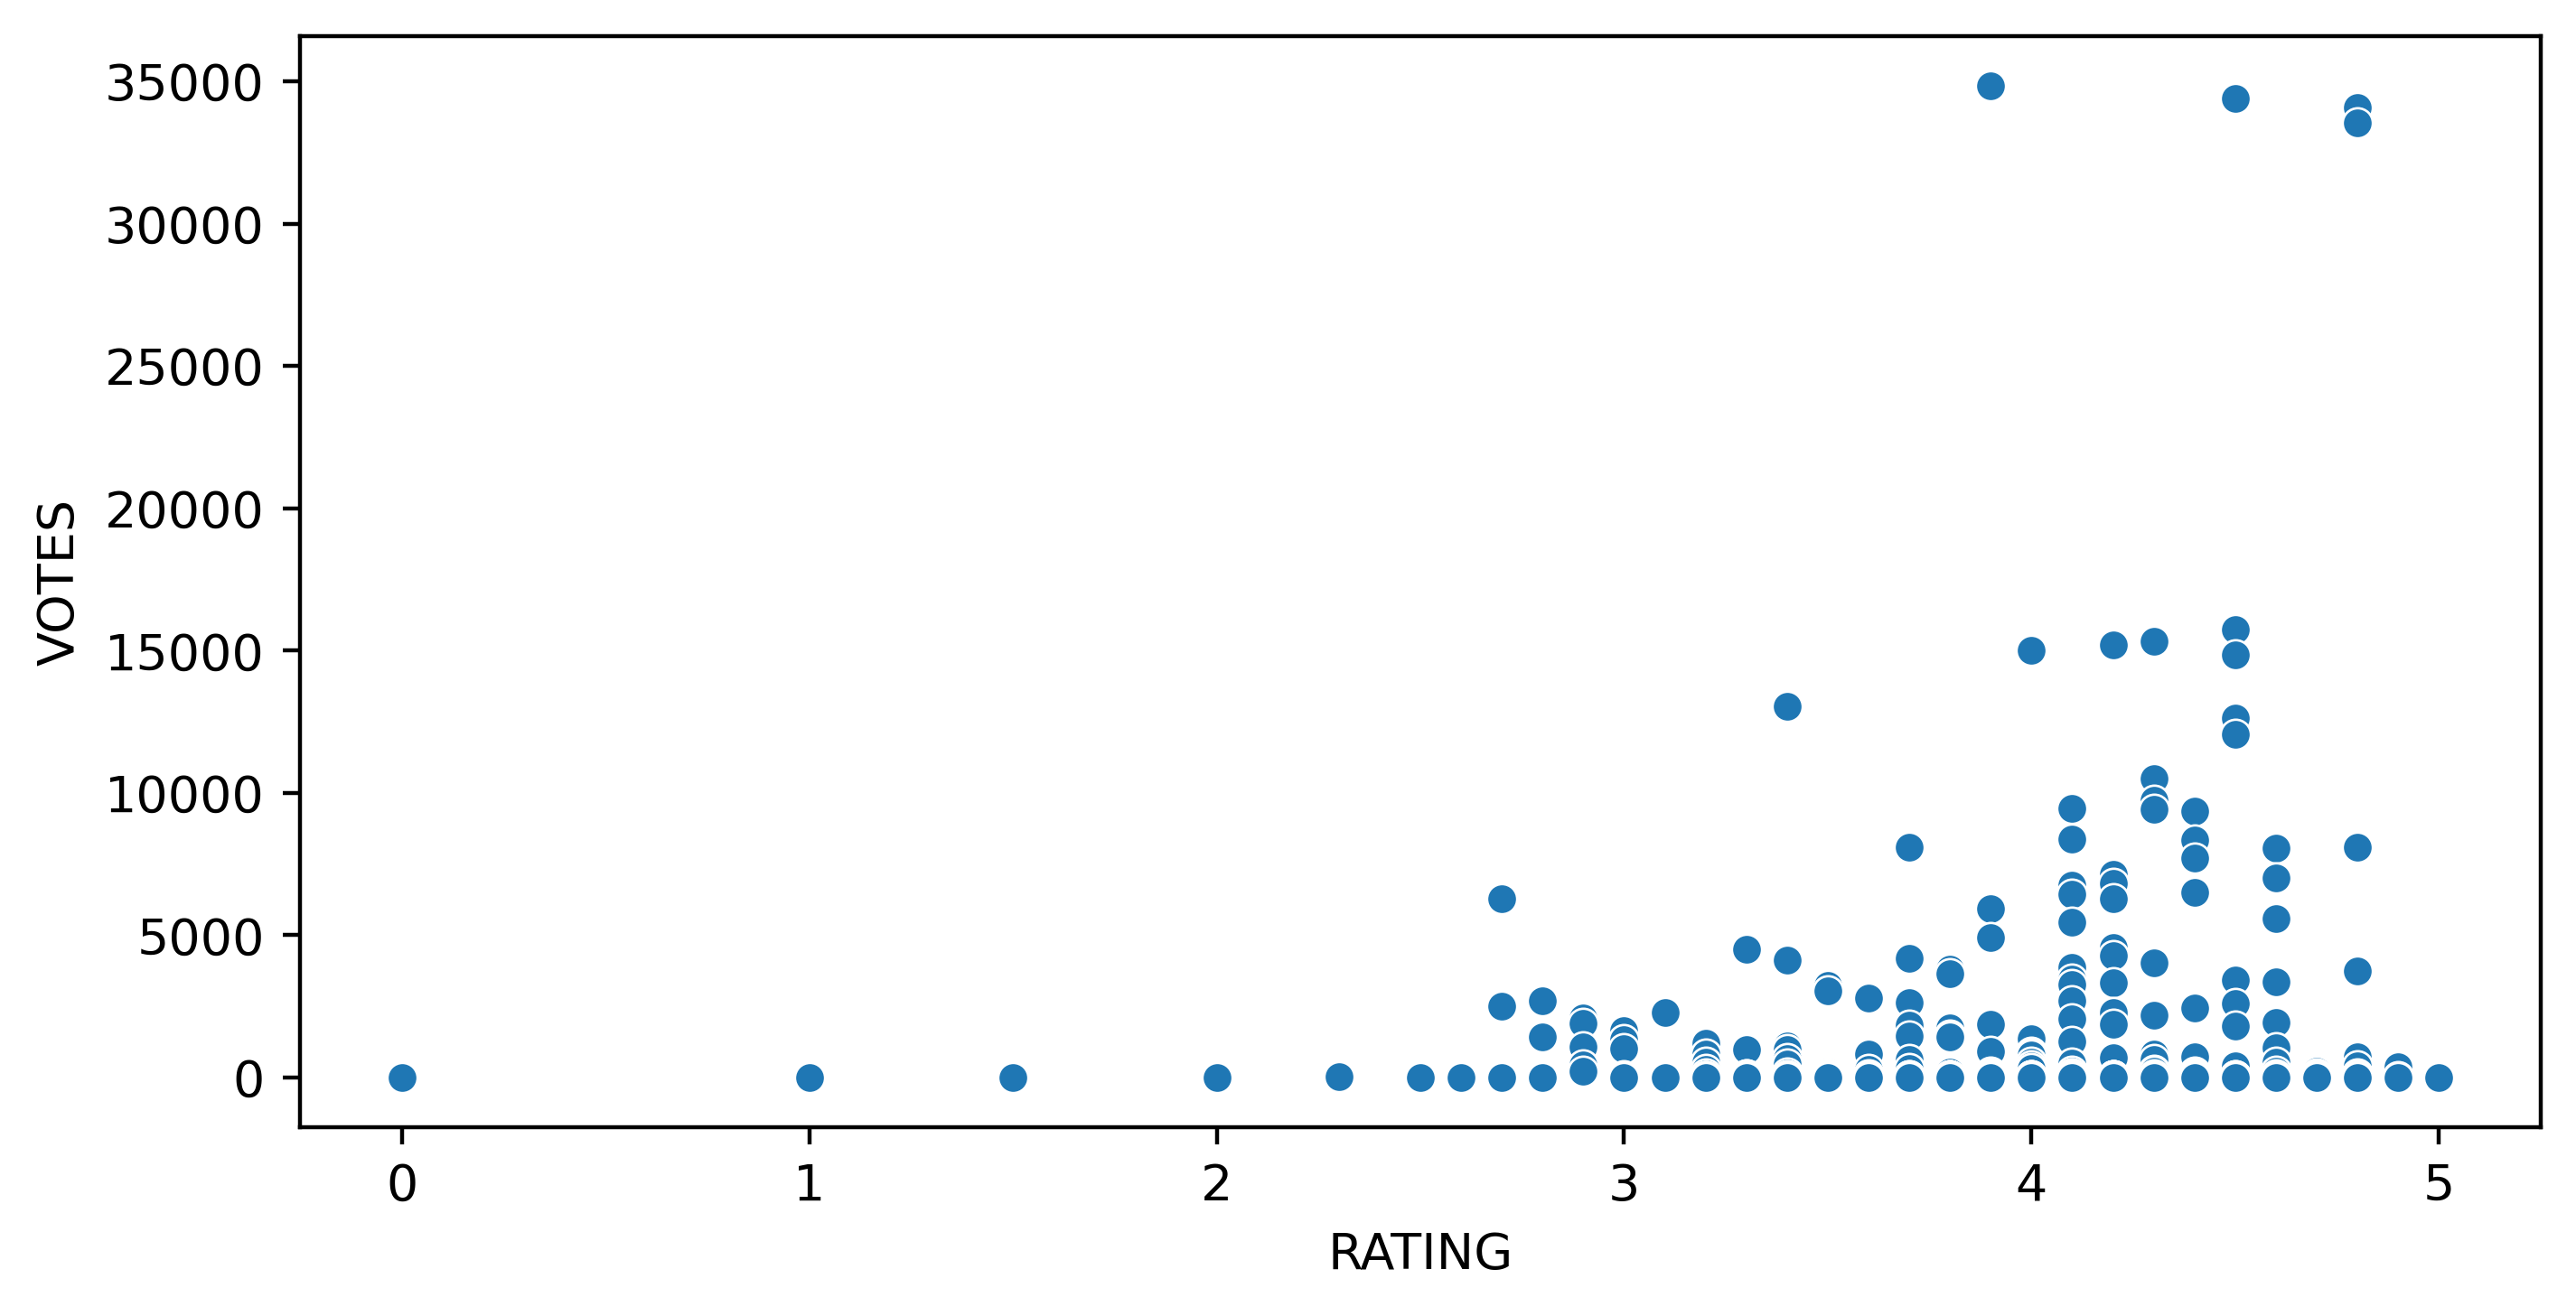

In [10]:
plt.figure(figsize = (8,4), dpi = 400)
sns.scatterplot(data = fand, y = 'VOTES', x = 'RATING')
plt.show()

Calculating relationship between the columns: 

In [12]:
fand.drop("FILM", axis = 1).corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


Creating a new column 'YEAR' to extract the year from FILM

In [14]:
title = 'Film Title Name(Year)'

In [15]:
title.split('(')[-1].replace(')', '')

'Year'

In [16]:
fand['YEAR'] = fand['FILM'].apply(lambda title : title.split('(')[-1].replace(')', ''))

In [17]:
fand.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


How many movies are in the Fandango DF per year

In [19]:
fand['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

Visualising the count of movies per year with countplot

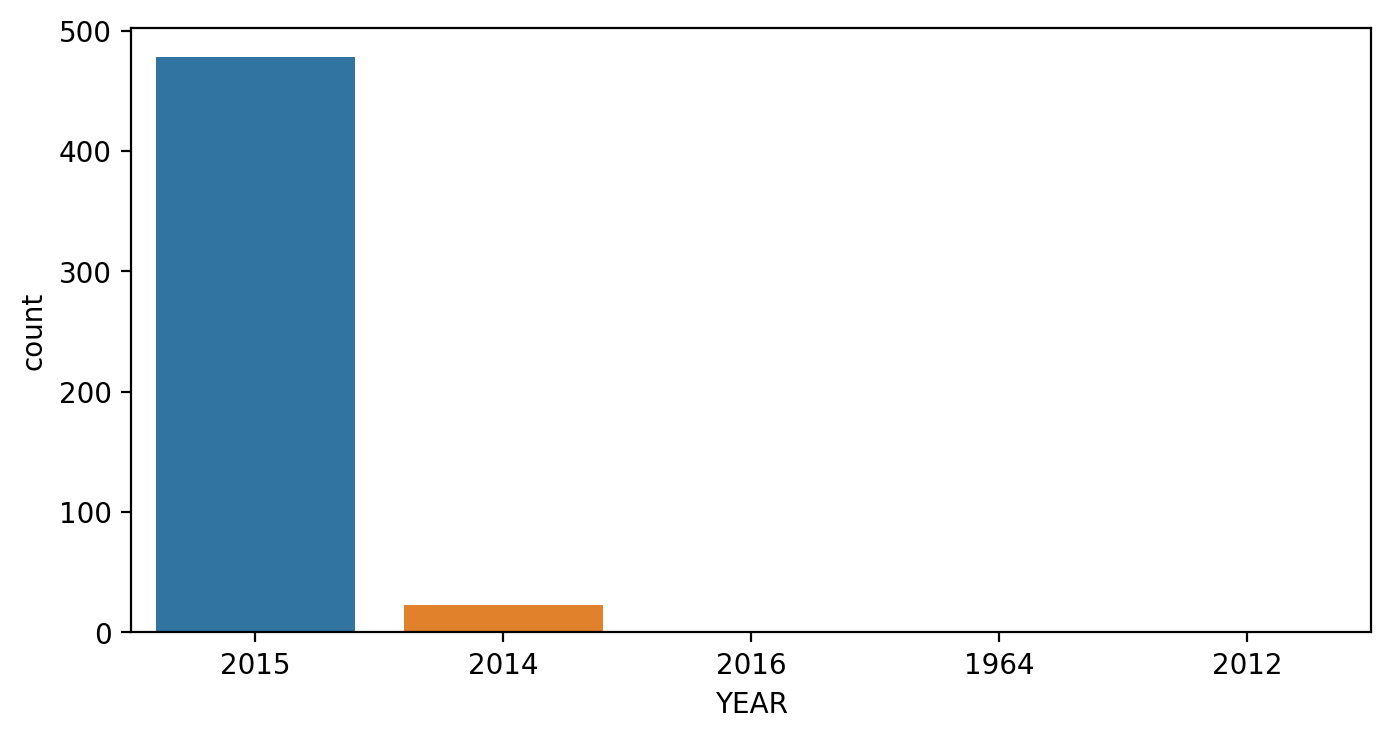

In [21]:
plt.figure(figsize = (8,4), dpi = 200)
sns.countplot(data = fand, x = 'YEAR')
plt.show()

Top 10 movies with highest number of votes

In [23]:
fand.nlargest(10, "VOTES")

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


How many movies have zero votes ?

In [25]:
fand[fand["VOTES"] == 0]  

,FILM,STARS,RATING,VOTES,YEAR
435,6 Years (2015),0.0,0.0,0,2015
436,7 Minutes (2015),0.0,0.0,0,2015
437,A Year in Champagne (2015),0.0,0.0,0,2015
438,Balls Out (2015),0.0,0.0,0,2015
439,Before I Wake (2015),0.0,0.0,0,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [26]:
zr_rating = fand['VOTES'] == 0 

In [27]:
zr_rating.sum()

69

Creating a Dataframe of only reviewd films (remove all the films that have 0 rating )

In [29]:
fand_rev = fand[fand['VOTES'] >0]

In [30]:
fand_rev

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


Create one or more KDE Plots that displays the distribution of ratings that are displayed(STARS) vs what ther true rating was from votes(RATING). Clip the KDE's from 0-5

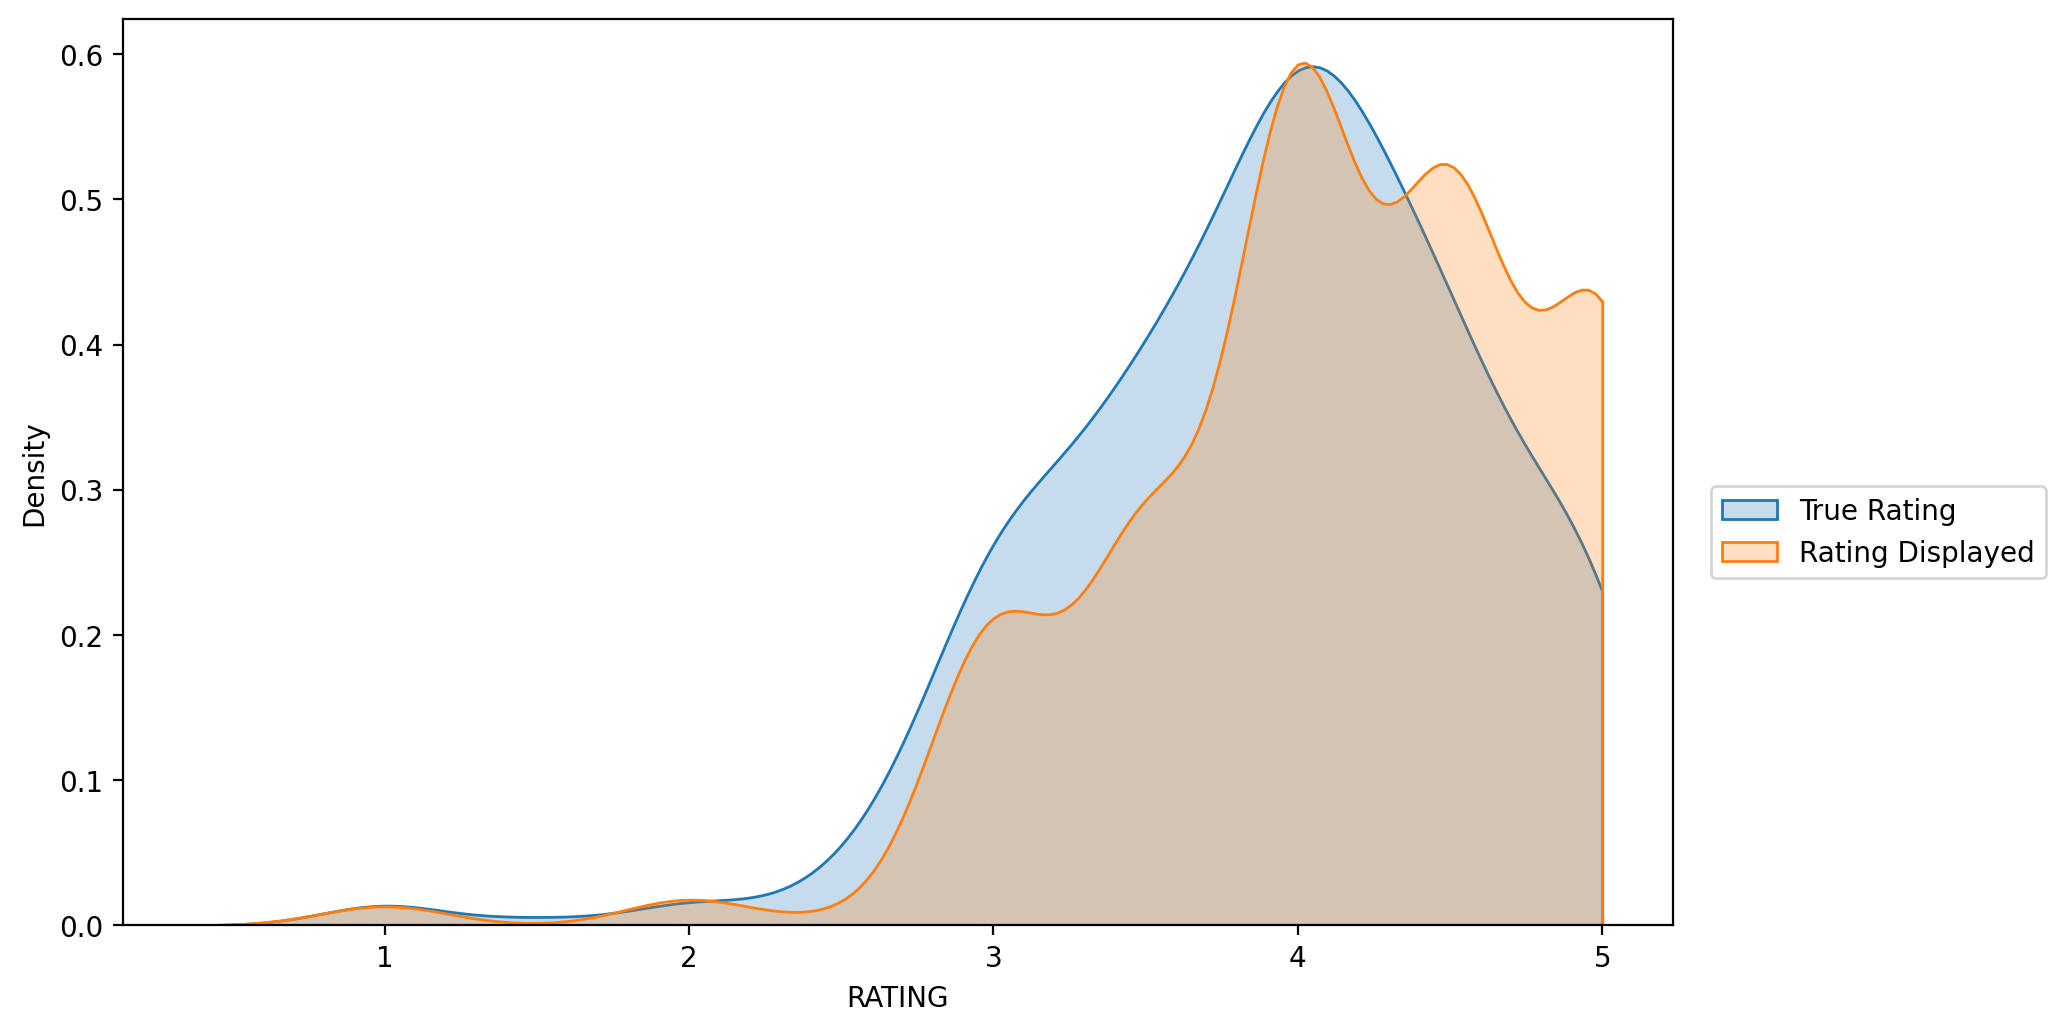

In [32]:
plt.figure(figsize = (10,6), dpi = 200)
sns.kdeplot(data = fand_rev, x= "RATING",  clip = [0,5], fill = True, label = "True Rating")
sns.kdeplot(data = fand_rev, x= "STARS",  clip = [0,5], fill = True, label = "Rating Displayed")
plt.legend(bbox_to_anchor = (1.25,0.5))

Let's now quantify this discrepancy. Create a new column of the difference between STARS displayed versus true RATING. Calculate this difference with STARS-RATING and round these differences to the nerest decimal point.

In [34]:
fand_rev["STARS_DIFF"] = (fand_rev["STARS"])-fand_rev["RATING"]

/tmp/ipykernel_165/660759437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fand_rev["STARS_DIFF"] = (fand_rev["STARS"])-fand_rev["RATING"]


In [35]:
fand_rev["STARS_DIFF"] = fand_rev['STARS_DIFF'].round(2)

/tmp/ipykernel_165/182060908.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fand_rev["STARS_DIFF"] = fand_rev['STARS_DIFF'].round(2)


In [36]:
fand_rev

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


Create a countplot to display the number of times a certain difference occure.

<AxesSubplot:xlabel='STARS_DIFF', ylabel='count'>

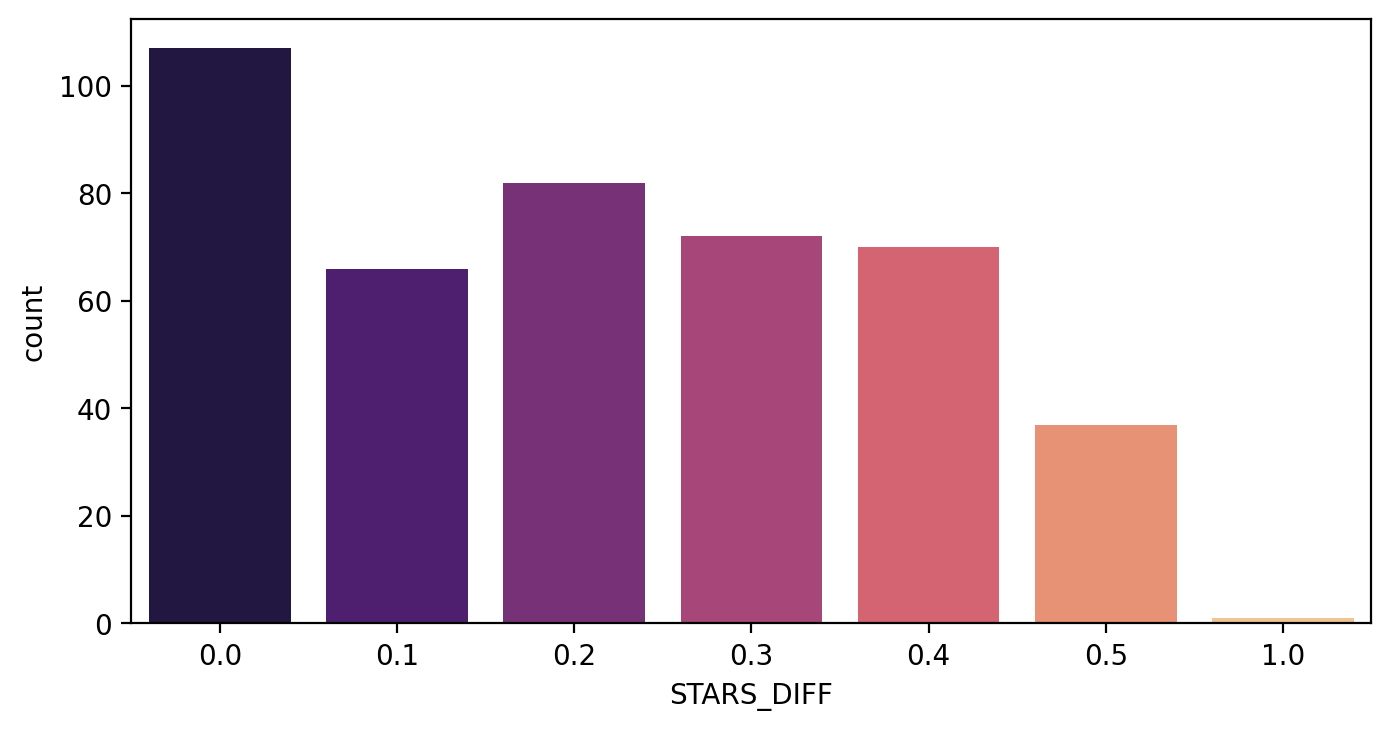

In [38]:
plt.figure(figsize = (8,4), dpi = 200)
sns.countplot(data = fand_rev, x = 'STARS_DIFF', palette = 'magma')

We can see the difference from the plot that one movie was displaying over a 1 STAR differece than
its true rating. What movie has this close to 1 star differencial ? 

In [40]:
fand_rev[fand_rev["STARS_DIFF"] > 0.5]

,FILM,STARS,RATING,VOTES,YEAR,STARS_DIFF
381,Turbo Kid (2015),5.0,4.0,2,2015,1.0


## Comparision of Fandango Ratings to Other Sites 

Let's now compare the the scores from Fandango to other movie sites and see how they comapre.

In [43]:
site_scr = pd.read_csv("all_sites_scores.csv")

Explore the DataFrame columns, info and description.

In [45]:
site_scr.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [46]:
site_scr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [47]:
site_scr.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,185.705479,42846.205479
std,30.168799,20.024430,19.517389,1.510712,0.958736,316.606515,67406.509171
min,5.000000,20.000000,13.000000,2.400000,4.000000,4.000000,243.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,33.250000,5627.000000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,72.500000,19103.000000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,168.500000,45185.750000
max,100.000000,94.000000,94.000000,9.600000,8.600000,2375.000000,334164.000000


## Rotten Tomatoes 

Let's first take a look at Rotten Tomatoes, RT has two sets of reviews, their critics 
review(ratings published by official critics) and user reviews.

Create a scatterplot exploring the relationship between RT critic reviews and RT user reviews 

(0.0, 100.0)

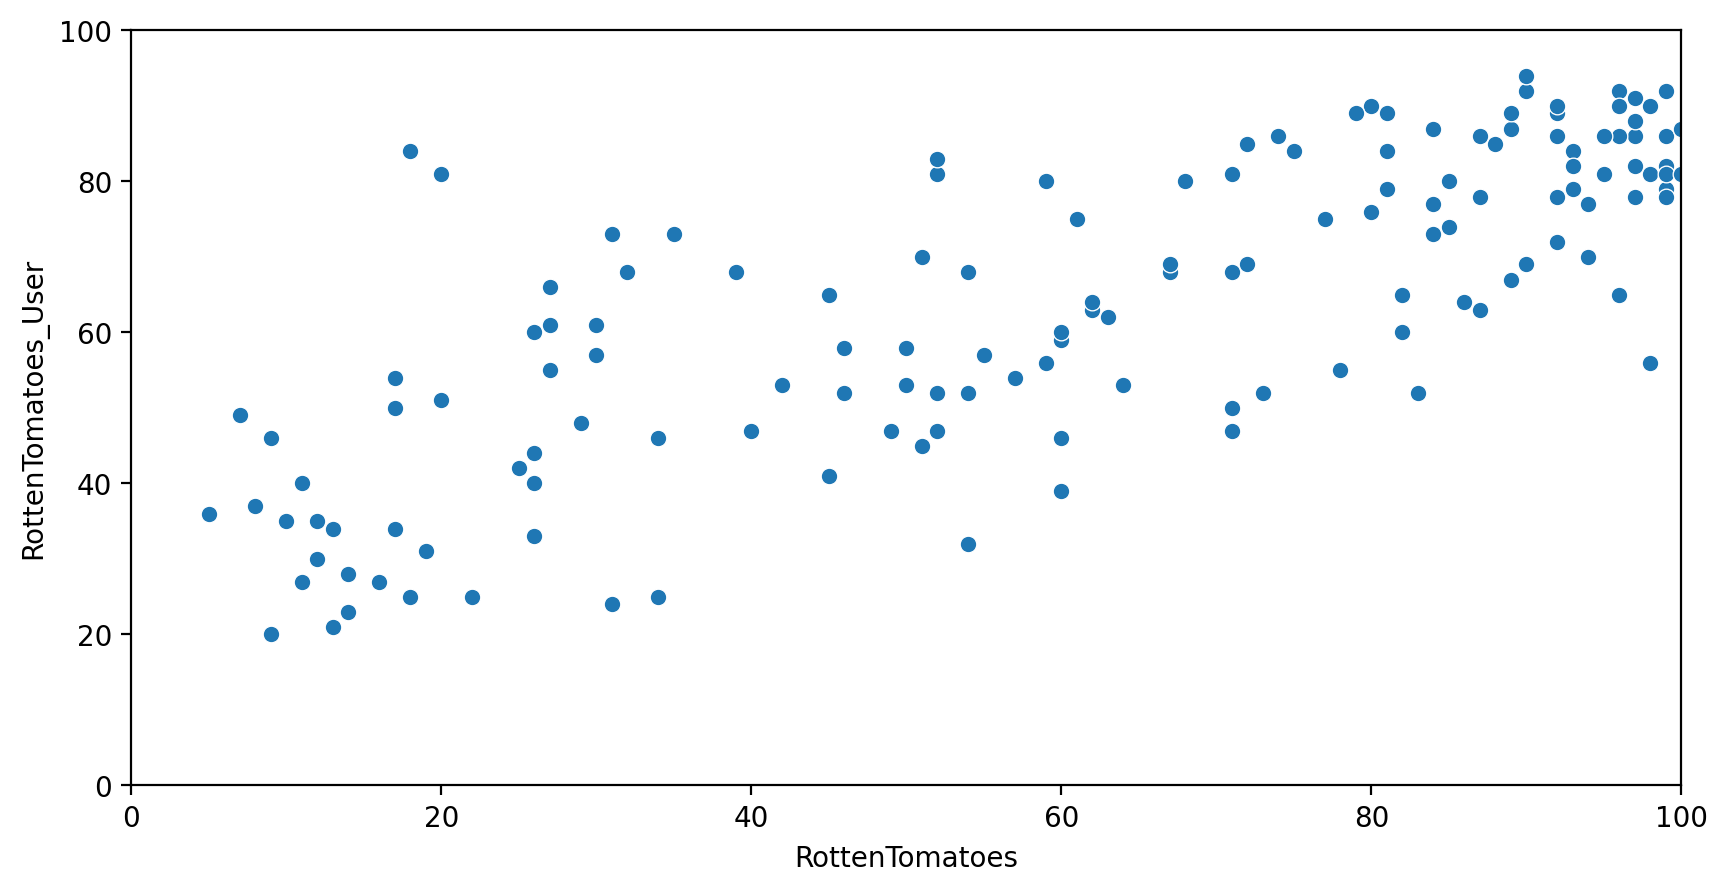

In [51]:
plt.figure(figsize = (10,5), dpi = 200)
sns.scatterplot(data = site_scr, x = 'RottenTomatoes', y = "RottenTomatoes_User")
plt.xlim(0,100)
plt.ylim(0,100)

Let's quantify this difference by comparing the critics ratings and the RT User Ratinsgs. We will calculate 
this  with RottenTomatoes-Rotten-Tomamtoes_User. 
Note: Rotten_Diff here is Critics - User Score. So values closer to 0 means aggrement between Critics and Users.
Larger positive values means critics rated much higher than users. Larger negative values means users 
rated much higher than critics.


Create a new column based off the difference critics rating and users ratings for RottenTomatoes-RottenTomatoes_User. 

In [54]:
site_scr["Rotten_Diff"] = site_scr["RottenTomatoes"]-site_scr["RottenTomatoes_User"]

In [55]:
site_scr

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14
...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19


Now let's compare the overall mean difference. Since we are dealing with differences that could
be negative or positive, first take the absolute value of all the differences, then take the mean. 
This would report back on average to absolute difference between the critics rating versus the user rating. 

Calculate the Mean Absolute Difference between RT scores and RT User scores as described above.

In [58]:
site_scr["Abs_Rott_Diff"] = site_scr["Rotten_Diff"].abs()

In [59]:
RT_Abs_Diff = site_scr["Rotten_Diff"].abs().mean()
RT_Abs_Diff

15.095890410958905

Plot the distribution of the differences between RT Critics Score and RT User Score.
There should be negative values in the distribution plot.
Use the KDE plot or Histograms to display the distribution.

(-70.0, 50.0)

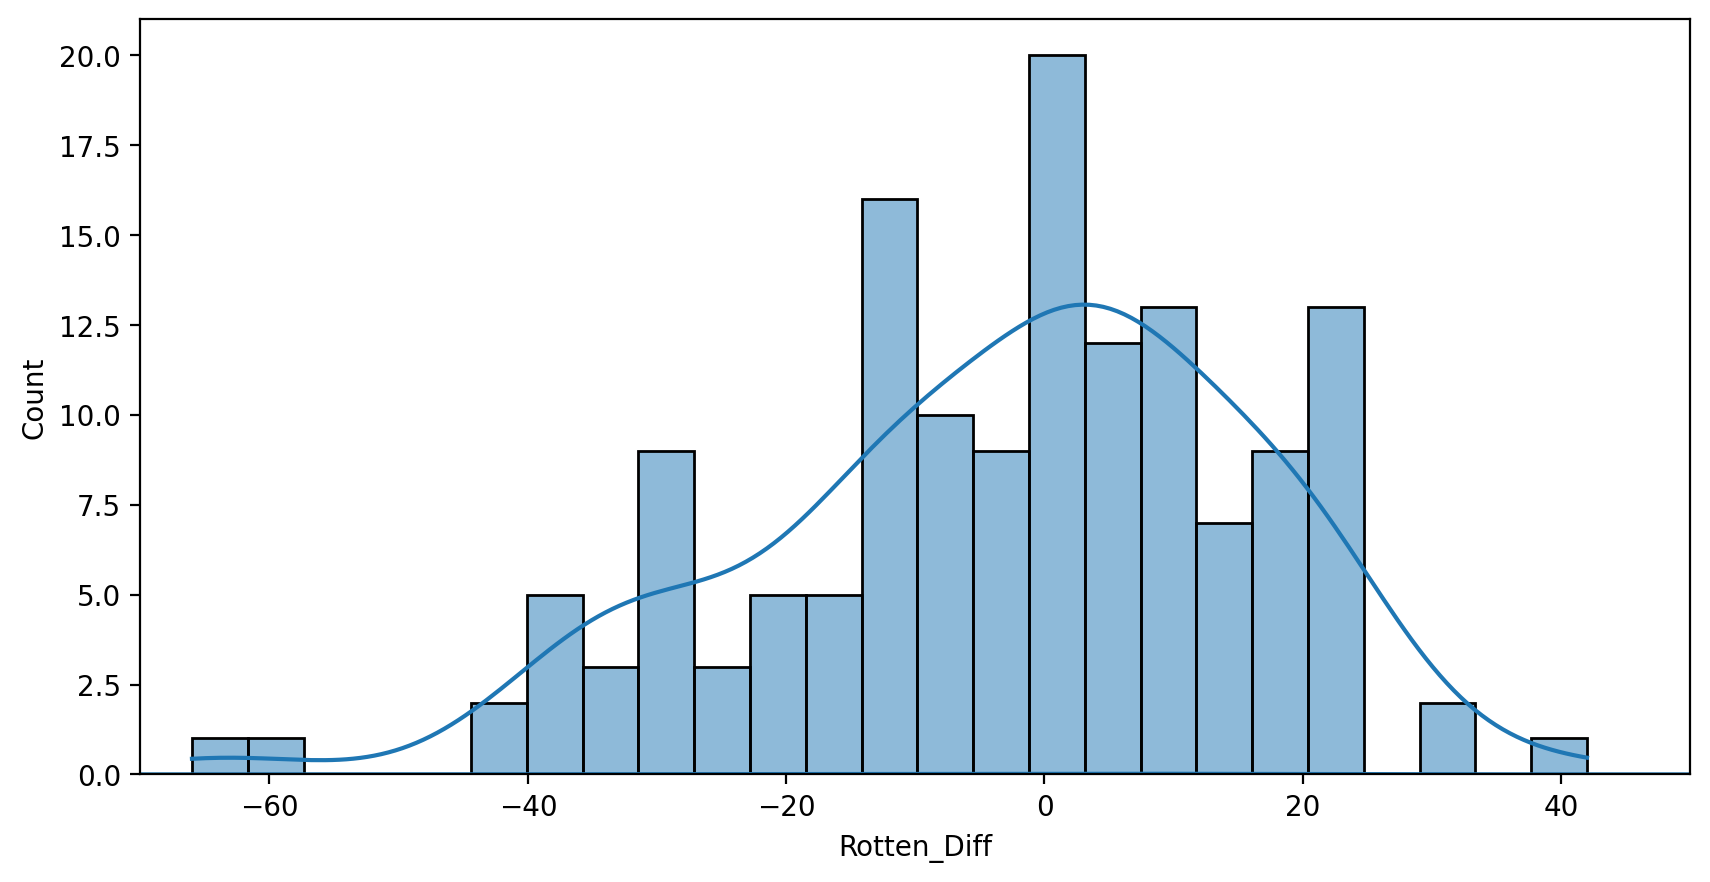

In [61]:
plt.figure(figsize = (10,5), dpi = 200)
sns.histplot(data = site_scr, x = "Rotten_Diff", kde =True, bins = 25)
sns.kdeplot(data = site_scr, x = "Rotten_Diff")
plt.xlim(-70,50)

Now create a distribution showing the absolute value difference between Critics and Users 
on Rotten Tomatoes.

<AxesSubplot:xlabel='Abs_Rott_Diff', ylabel='Count'>

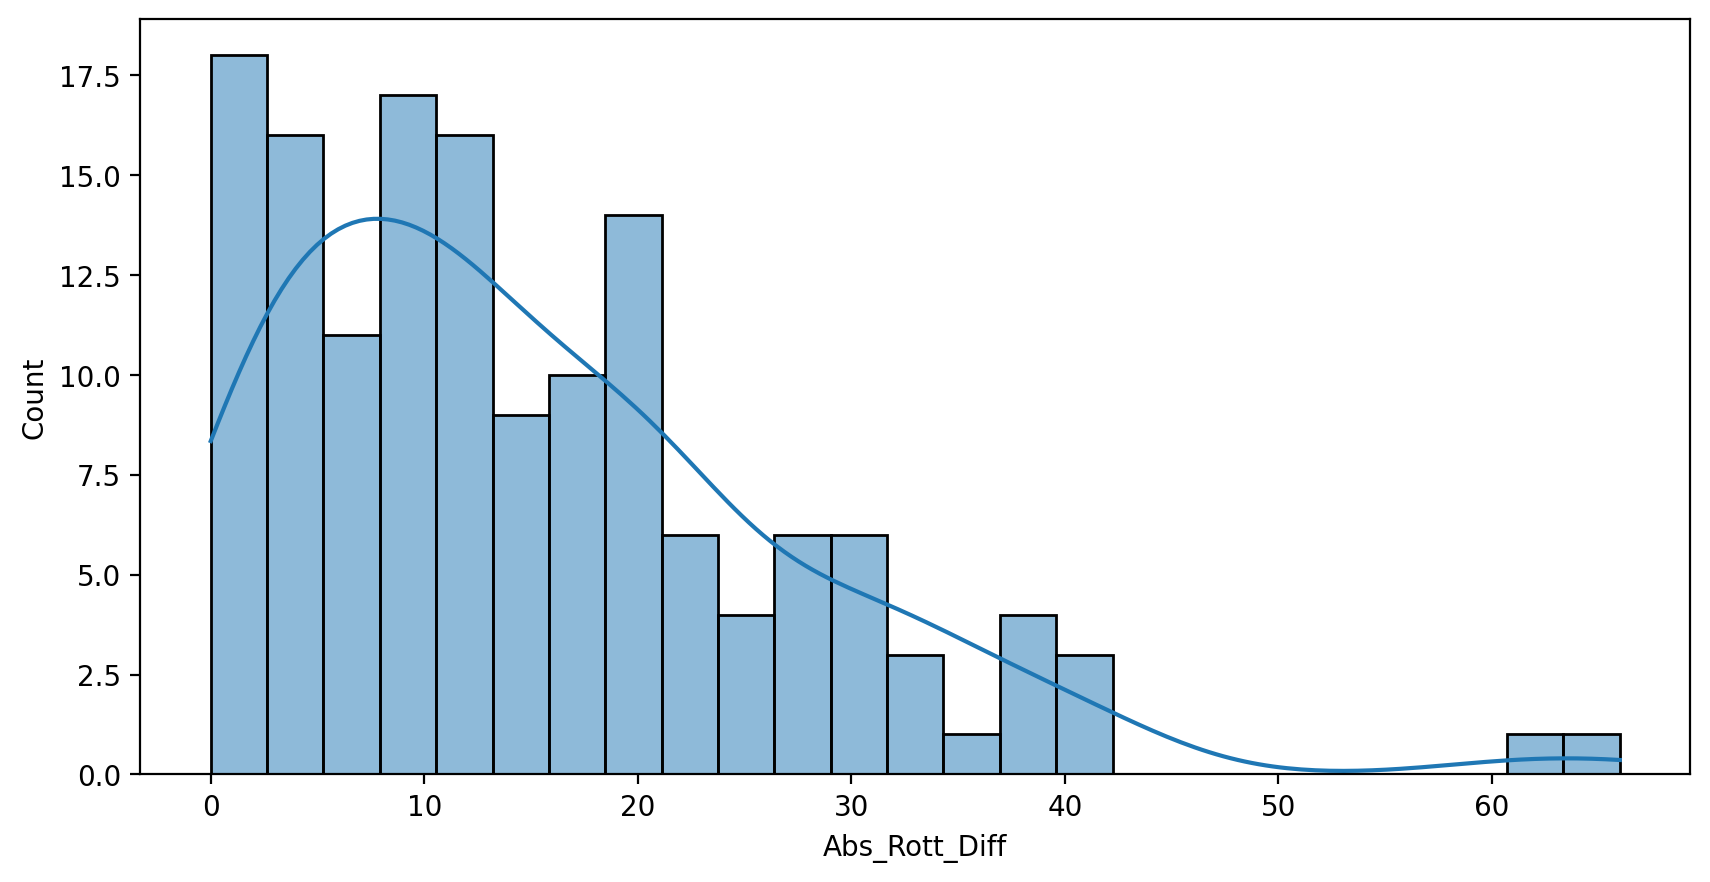

In [63]:
plt.figure(figsize = (10,5), dpi = 200)
sns.histplot(data = site_scr, x = "Abs_Rott_Diff", kde = True, bins = 25)

Let's find out which movies are causing the largest differences. First show the top 5 movies 
with the largest negative difference between Users and RT critics. Since we calculated the 
difference as Critics Rating - User Rating, then large negative values imply the usersrated the movie 
much higher on average than the critics did.

What are the top 5 movies users rated higher than critics on average.

In [66]:
site_scr.nsmallest(5, "Rotten_Diff")["FILM"]

3         Do You Believe? (2015)
85             Little Boy (2015)
105      Hitman: Agent 47 (2015)
134      The Longest Ride (2015)
125    The Wedding Ringer (2015)
Name: FILM, dtype: object

Now show the top 5 movies critics scores higher than users on average.

In [68]:
site_scr.nlargest(5, "Rotten_Diff")["FILM"]

69                    Mr. Turner (2014)
112                   It Follows (2015)
115            While We're Young (2015)
37                 Welcome to Me (2015)
40     I'll See You In My Dreams (2015)
Name: FILM, dtype: object

## MetaCritic

Now lets take a quick look at the ratings from MetaCritic. MetaCritic also shows an average user
rating versus their official displayed rating.

Display a scatterplot of the MetaCritic Rating versus the MetaCritic User Rating.

(0.0, 10.0)

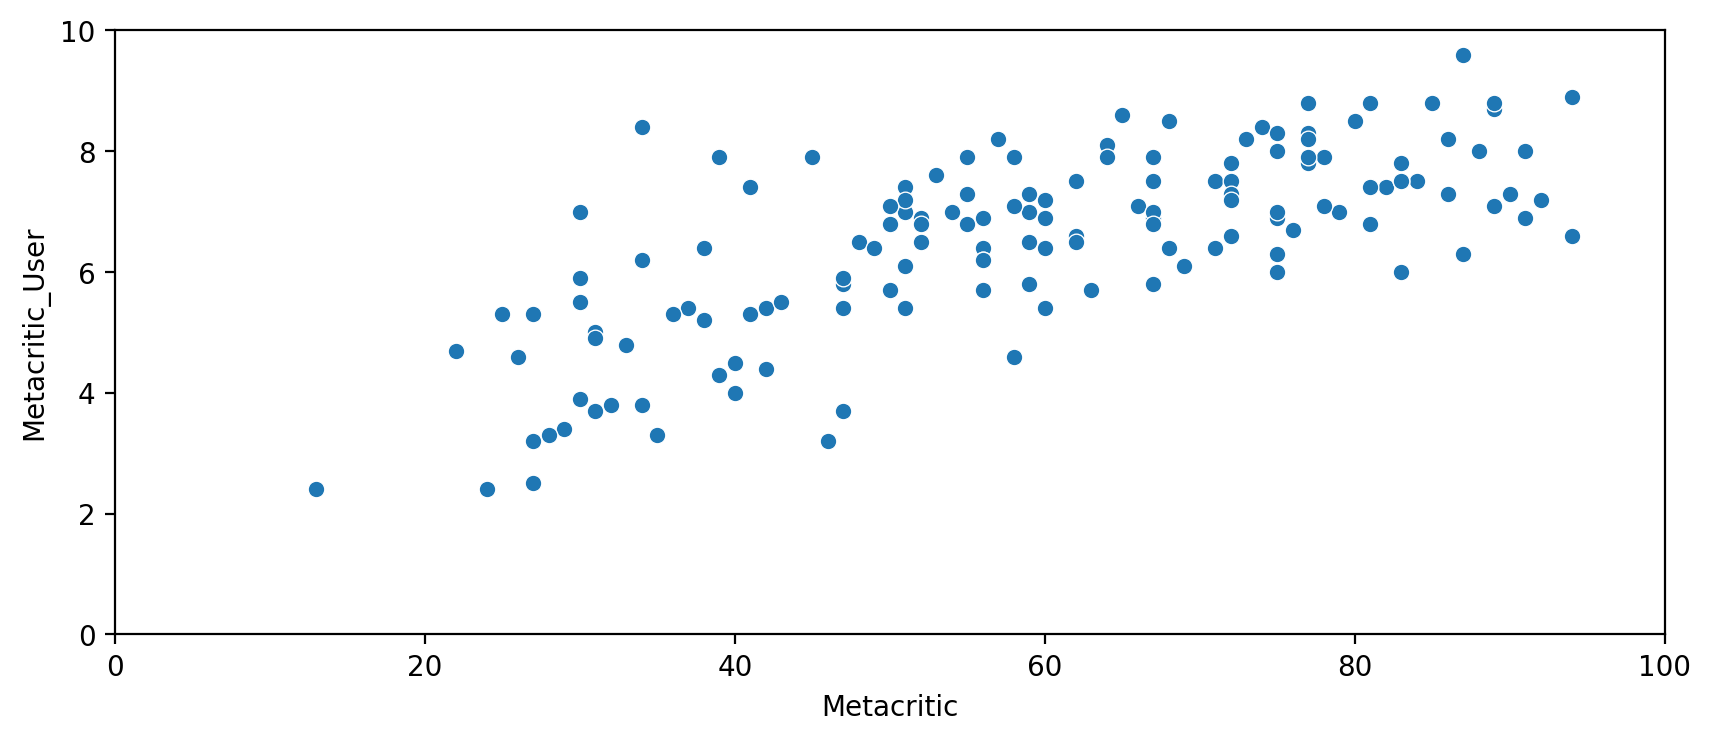

In [72]:
plt.figure(figsize = (10,4), dpi = 200)
sns.scatterplot(data = site_scr, x = "Metacritic", y = "Metacritic_User")
plt.xlim(0,100)
plt.ylim(0,10)

## IMDB

Finally let's explore IMDB. Notice that both MetaCritic and IMDB report back vote counts. 
Let's analyze the most popular movies.

Create a scatterplot for the relationship between vote counts on MetaCritic versus vote
counts onm IMDB.

<AxesSubplot:xlabel='Metacritic_user_vote_count', ylabel='IMDB_user_vote_count'>

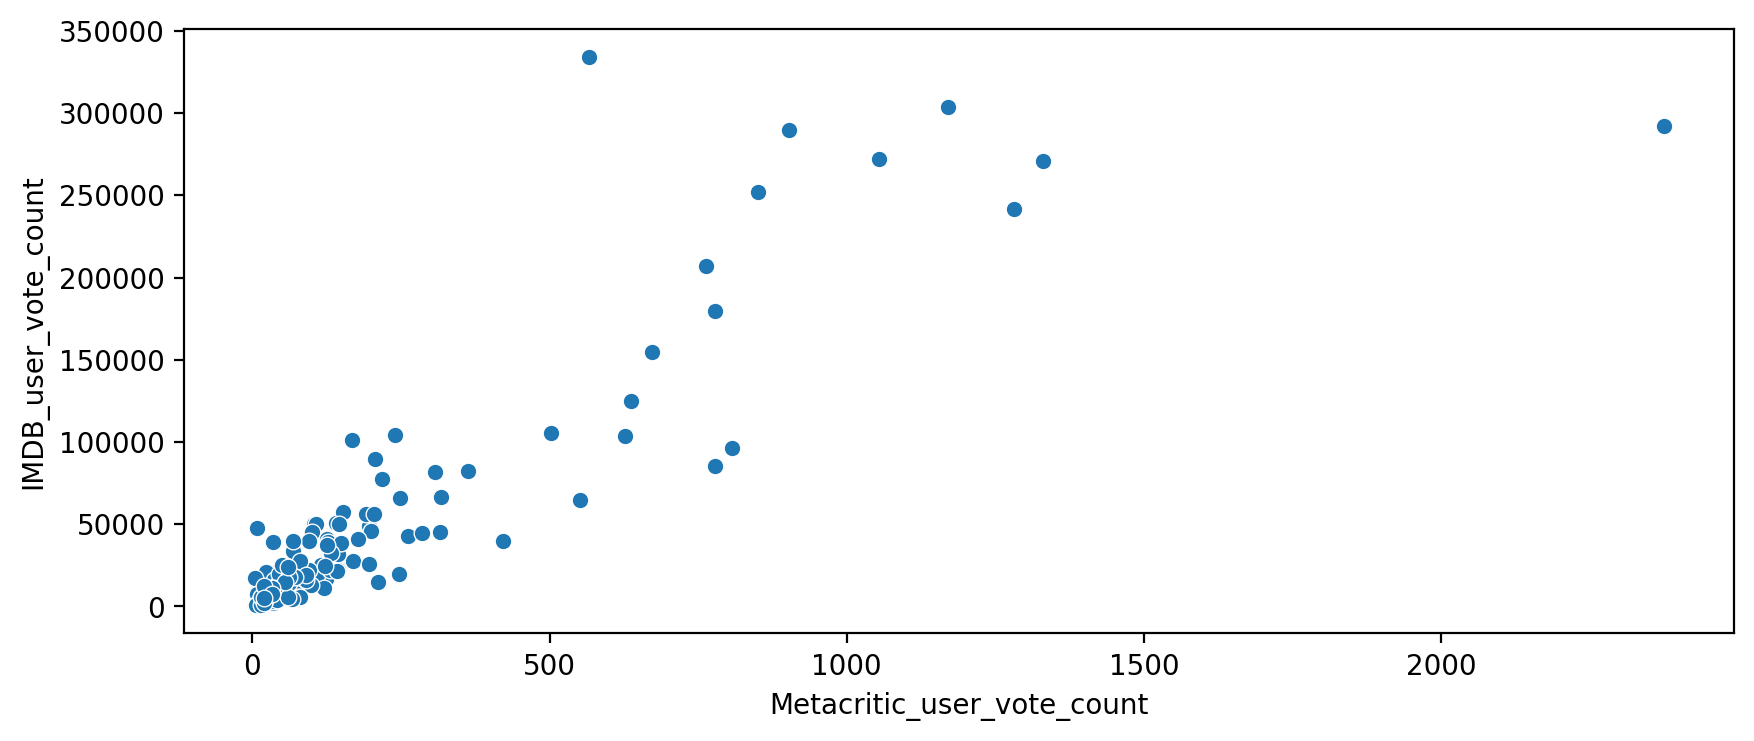

In [76]:
plt.figure(figsize = (10,4), dpi = 200)
sns.scatterplot(data = site_scr, x = 'Metacritic_user_vote_count', y = 'IMDB_user_vote_count')

<AxesSubplot:xlabel='IMDB_user_vote_count', ylabel='Metacritic_user_vote_count'>

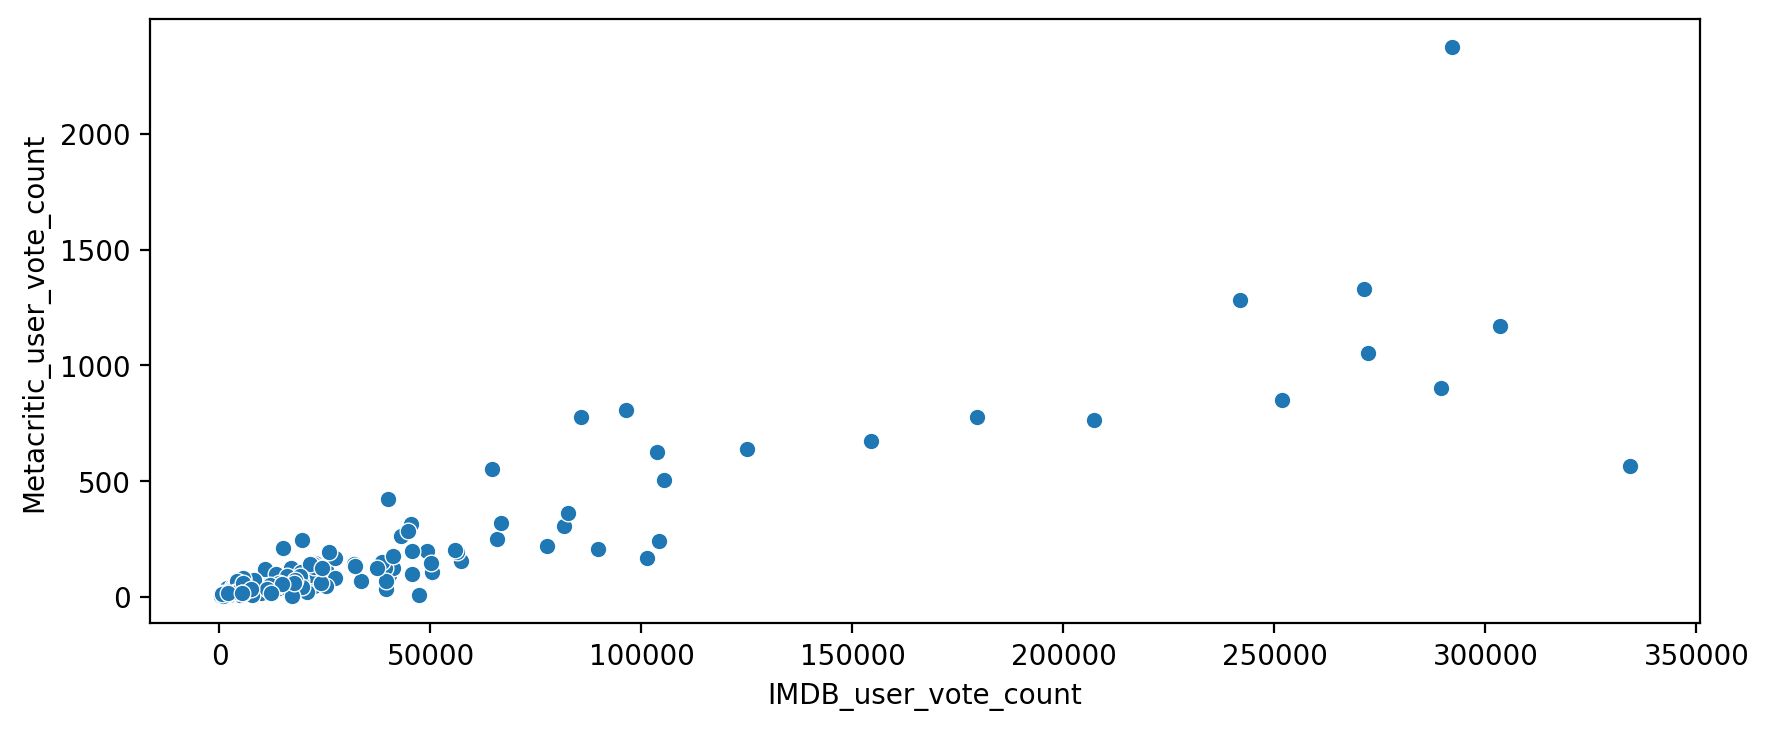

In [77]:
plt.figure(figsize = (10,4), dpi = 200)
sns.scatterplot(data = site_scr, y = 'Metacritic_user_vote_count', x = 'IMDB_user_vote_count')

Notice there are two outliers here. The movie with highest vote count on IMDB only has about 500 
Metacritic ratings. What is this movie ? 

What movie has the highest IMDB user vote count ?

In [80]:
site_scr.nlargest(1,'IMDB_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Abs_Rott_Diff
14,The Imitation Game (2014),90,92,73,8.2,8.1,566,334164,-2,2


What movie has the highest Metacritic user vote count ?

In [82]:
site_scr.nlargest(1,'Metacritic_user_vote_count')

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Abs_Rott_Diff
88,Mad Max: Fury Road (2015),97,88,89,8.7,8.3,2375,292023,9,9


## Fandango Scores vs. All Sites

Finally let's began to explore whether or not Fandango artificially displays higher ratings than 
warranted to boost ticket sales. 

Combine the Fandango Table with the All Sites Table. Not every movie in the Fandango Table is in the
All sites table, since some Fandango movies has very  little or no reviews. We only want to compare 
movies that are in both DataFrames, so do an inner merge to merge together both DataFrames based on 
the FILM columns.

In [86]:
fand

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [87]:
site_scr

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Abs_Rott_Diff
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107,-12,12
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709,5,5
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660,-10,10
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136,-66,66
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560,-14,14
...,...,...,...,...,...,...,...,...,...,...
141,Mr. Holmes (2015),87,78,67,7.9,7.4,33,7367,9,9
142,'71 (2015),97,82,83,7.5,7.2,60,24116,15,15
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,123,24345,19,19
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,19,1955,19,19


In [88]:
pd.merge(fand, site_scr, how = 'inner', on = 'FILM')

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Abs_Rott_Diff
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,17
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,10
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,13
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,3
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24,24
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14,14
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9,9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9,9


## Normalize columns to Fandango STARS and RATINGS 0-5

Notice that RT, MetaCritic and IMDB don't use a score between 0-5 stars like Fandango does. 
In order to do  a fair comparision, we need rto normalize these values so they all fall between 0-5 stars 
and the relationship between reviews stay the same.

Create new NORMALIZED columns for all ratings so they match up within the 0-5 star range
shown on Fandango. 

In [92]:
all_rating = pd.merge(fand, site_scr , on = 'FILM', how = 'inner')

In [93]:
all_rating.describe().transpose()['max']

STARS                              5.0
RATING                             4.8
VOTES                          34846.0
RottenTomatoes                   100.0
RottenTomatoes_User               94.0
Metacritic                        94.0
Metacritic_User                    9.6
IMDB                               8.6
Metacritic_user_vote_count      2375.0
IMDB_user_vote_count          334164.0
Rotten_Diff                       42.0
Abs_Rott_Diff                     66.0
Name: max, dtype: float64

In [171]:
all_rating['RT_Norm'] = np.round((all_rating['RottenTomatoes']/100)*5,1)

In [173]:
all_rating['RT_Norm']

0      1.2
1      3.6
2      3.6
3      4.1
4      4.9
      ... 
140    4.4
141    4.8
142    4.6
143    4.8
144    3.0
Name: RT_Norm, Length: 145, dtype: float64

In [175]:
all_rating['RTUser_Norm'] = np.round((all_rating['RottenTomatoes_User']/100)*5,1)

In [177]:
all_rating['RTUser_Norm']

0      2.1
1      4.1
2      4.2
3      4.2
4      4.5
      ... 
140    3.2
141    4.1
142    4.2
143    4.3
144    2.3
Name: RTUser_Norm, Length: 145, dtype: float64

In [179]:
all_rating['Meta_Norm'] = np.round((all_rating['Metacritic']/100)*5,1)

In [181]:
all_rating['Meta_Norm']

0      2.3
1      2.9
2      3.6
3      3.4
4      4.7
      ... 
140    3.4
141    4.4
142    3.4
143    4.3
144    3.4
Name: Meta_Norm, Length: 145, dtype: float64

In [185]:
all_rating['MetaUser_Norm'] = np.round((all_rating['Metacritic_User']/10)*5,1)

In [187]:
all_rating['MetaUser_Norm']

0      1.6
1      3.5
2      3.3
3      3.4
4      4.4
      ... 
140    3.2
141    3.2
142    3.5
143    3.6
144    2.9
Name: MetaUser_Norm, Length: 145, dtype: float64

In [189]:
all_rating['IMDB_Norm'] = np.round((all_rating['IMDB']/10)*5,1)

In [191]:
all_rating['IMDB_Norm']

0      2.1
1      3.6
2      3.7
3      3.7
4      4.3
      ... 
140    3.4
141    3.5
142    3.9
143    3.7
144    3.2
Name: IMDB_Norm, Length: 145, dtype: float64

In [203]:
all_rating

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,Rotten_Diff,Abs_Rott_Diff,RT_Norm,RTUser_Norm,Meta_Norm,MetaUser_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,25,42,46,3.2,4.2,778,179506,-17,17,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,34390,2015,71,81,59,7.0,7.3,1281,241807,-10,10,3.6,4.1,2.9,3.5,3.6
2,American Sniper (2015),5.0,4.8,34085,2015,72,85,72,6.6,7.4,850,251856,-13,13,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,33538,2015,81,84,67,6.8,7.4,764,207211,-3,3,4.1,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,15749,2015,98,90,94,8.9,8.6,807,96252,8,8,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,2015,87,63,68,6.4,6.7,19,5289,24,24,4.4,3.2,3.4,3.2,3.4
141,The Diary of a Teenage Girl (2015),4.0,3.6,38,2015,95,81,87,6.3,7.0,18,1107,14,14,4.8,4.1,4.4,3.2,3.5
142,The Wrecking Crew (2015),4.5,4.2,38,2015,93,84,67,7.0,7.8,4,732,9,9,4.6,4.2,3.4,3.5,3.9
143,Tangerine (2015),4.0,3.9,36,2015,95,86,86,7.3,7.4,14,696,9,9,4.8,4.3,4.3,3.6,3.7


Create a norm_scores DataFrame that only contains the normalizes ratings. Include both 
STARS and RATING from the original Fandango table.

In [214]:
norm_scores = all_rating[['STARS', 'RATING', 'RT_Norm' ,	'RTUser_Norm','Meta_Norm',	'MetaUser_Norm',	'IMDB_Norm']]

In [216]:
norm_scores

,STARS,RATING,RT_Norm,RTUser_Norm,Meta_Norm,MetaUser_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.1,2.9,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.1,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,4.0,3.6,4.8,4.1,4.4,3.2,3.5
142,4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,4.0,3.9,4.8,4.3,4.3,3.6,3.7


## Comparing distribution of Scores Across Sites

Now the moment of truth! Does Fandango display abnormally high ratings ? We already know it pushes display 
RATING higher than STARS, but are the ratings themselves higher than average ?

Create a plot comparing the distributions of normalized ratings across all sites.

In [249]:
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles,labels, loc = new_loc, title = title, **kws)

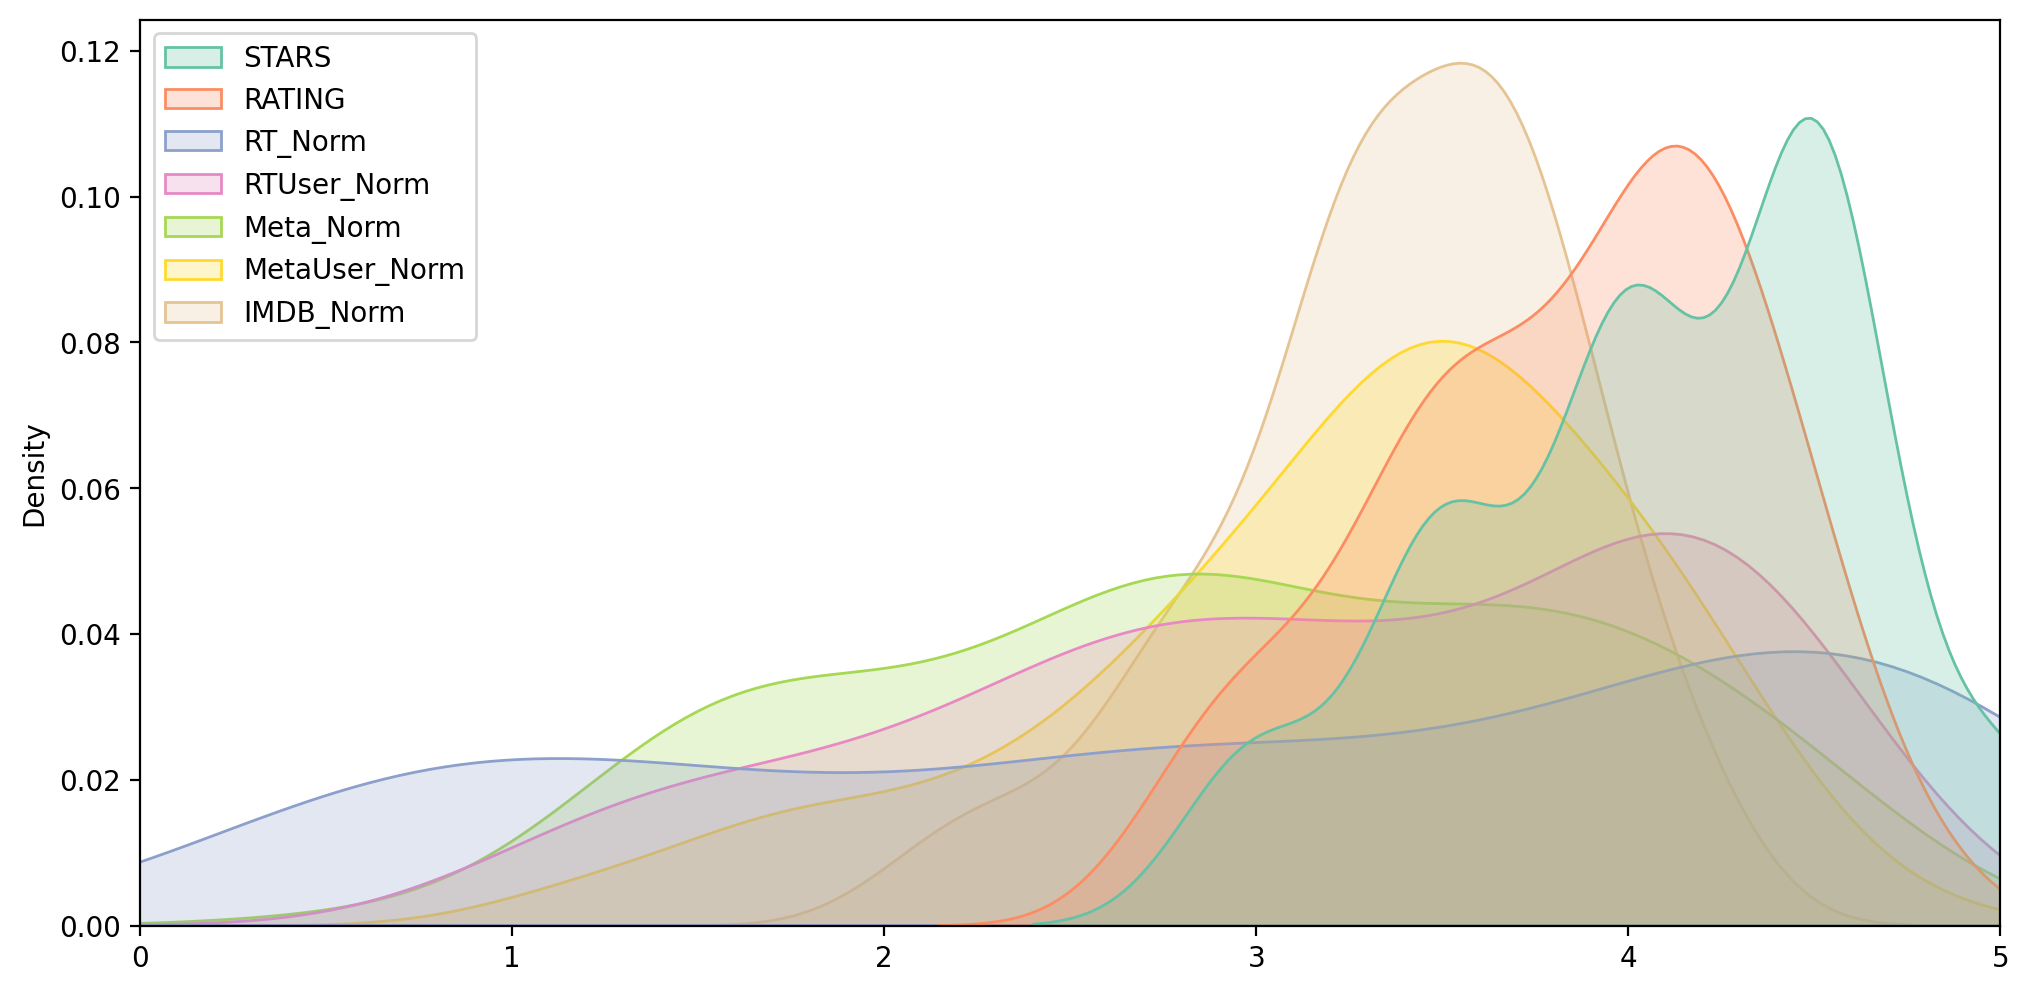

In [255]:
fig,ax = plt.subplots(figsize = (12,6), dpi = 200)
sns.kdeplot(data = norm_scores, fill = True, palette = 'Set2')
plt.xlim(0,5)
move_legend(ax, "upper left")

Clearly Fandango has an uneven distribution. We can also see that RT critics have the most uniform 
distribution.Let's directly compare these two.

Create a KDE plot that compares the distribution of RT Critic ratings against the STARS displayed
by Fandango.

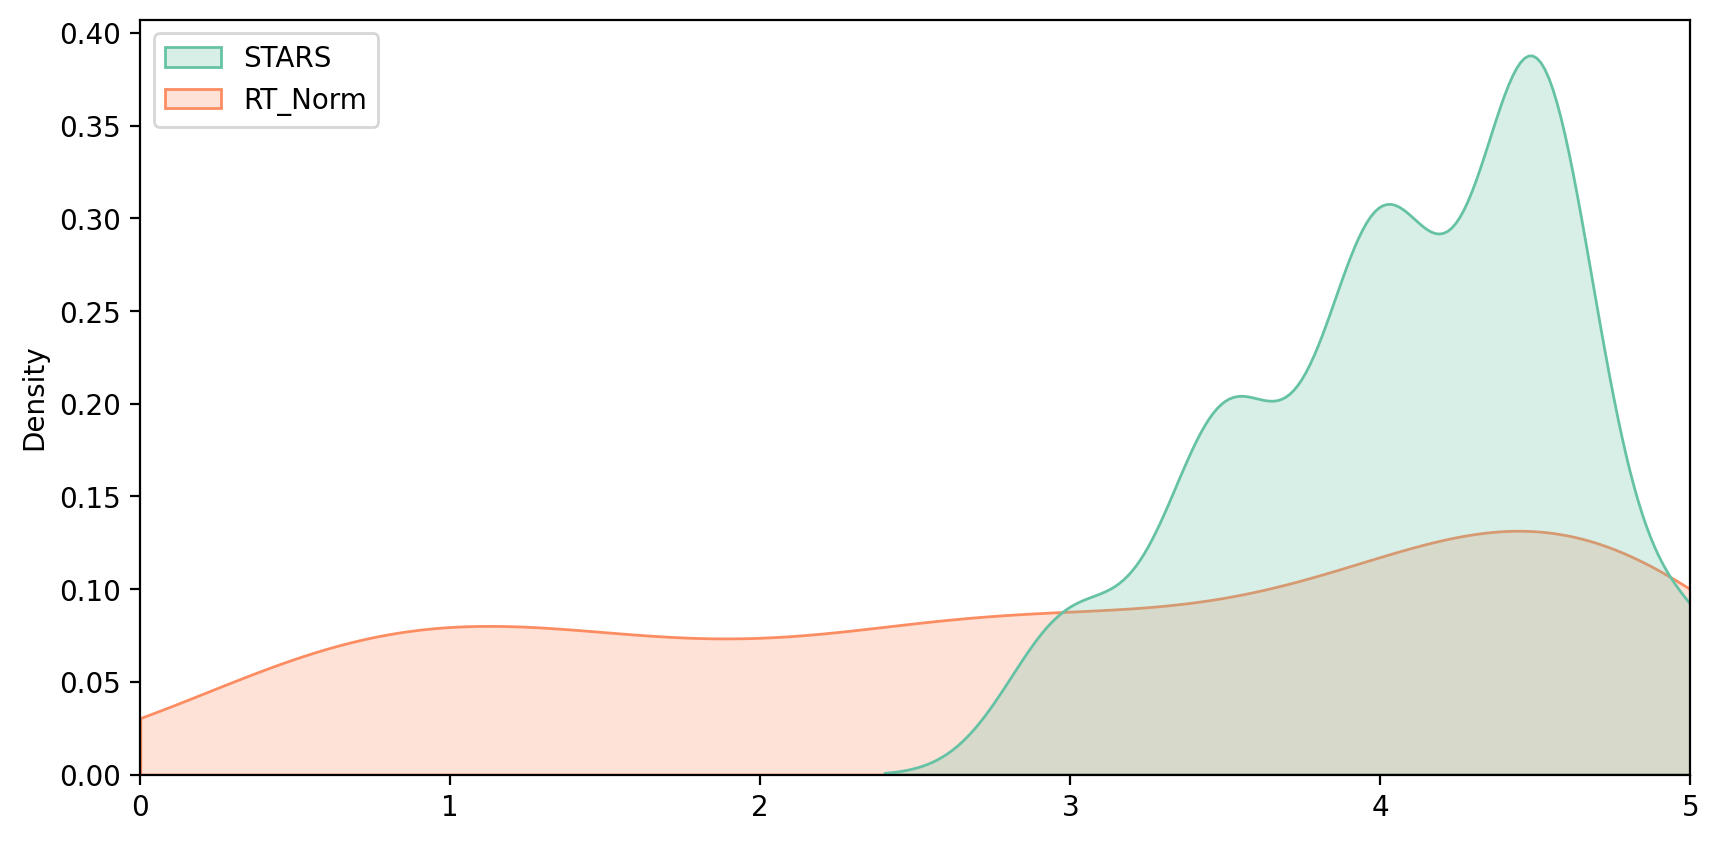

In [291]:
fig,ax = plt.subplots(figsize = (10,5), dpi = 200)
sns.kdeplot(data = norm_scores[['STARS', 'RT_Norm']], shade =True, clip = [0,5], label = 'STARS', palette = 'Set2')
plt.xlim(0,5)
move_legend(ax, "upper left")

Create a histplot comparing all normalize scores.

<AxesSubplot:ylabel='Count'>

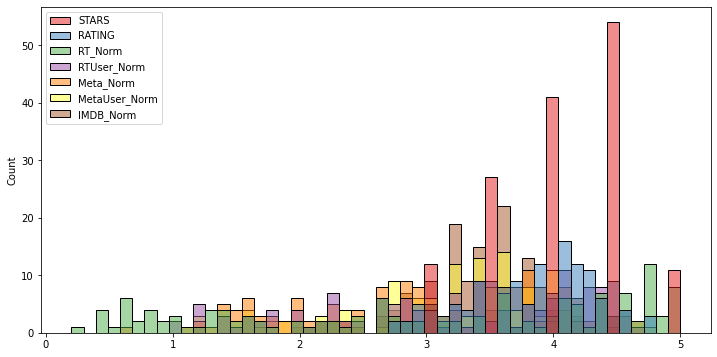

In [302]:
plt.figure(figsize = (12,6))
sns.histplot(norm_scores, bins =50, palette = 'Set1')

## How are the worst movies rated across all plateforms ?

Create a clumpster visualization of all normalized scores. Note the differece in ratings,
highly rated movies should be clustered together versus poorly rated movies. 

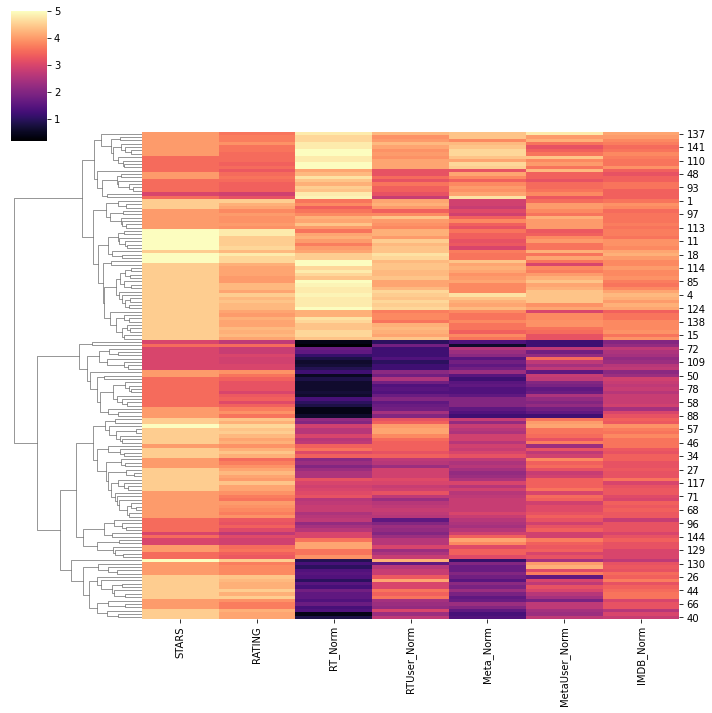

In [308]:
sns.clustermap(norm_scores,cmap = 'magma', col_cluster = False)

Clearly Fandango is rating movies much higher than other sites, especially considering that that 
it is then displaying a rounded up version of the rating. Let's examine the top 10 worst movies. 
Based off the Rotten Tomatoes Critic Ratings, what are the top 10 lowest rated movies ? What are the 
normalized scores across all plateforms for these movies ? 

In [311]:
norm_scores

,STARS,RATING,RT_Norm,RTUser_Norm,Meta_Norm,MetaUser_Norm,IMDB_Norm
0,4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,4.5,4.5,3.6,4.1,2.9,3.5,3.6
2,5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,5.0,4.8,4.1,4.2,3.4,3.4,3.7
4,4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...
140,3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,4.0,3.6,4.8,4.1,4.4,3.2,3.5
142,4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,4.0,3.9,4.8,4.3,4.3,3.6,3.7


In [313]:
norm_scores = all_rating[['FILM','STARS',	'RATING',	'RT_Norm',	'RTUser_Norm',	'Meta_Norm',	'MetaUser_Norm',	'IMDB_Norm']]

In [315]:
norm_scores

,FILM,STARS,RATING,RT_Norm,RTUser_Norm,Meta_Norm,MetaUser_Norm,IMDB_Norm
0,Fifty Shades of Grey (2015),4.0,3.9,1.2,2.1,2.3,1.6,2.1
1,Jurassic World (2015),4.5,4.5,3.6,4.1,2.9,3.5,3.6
2,American Sniper (2015),5.0,4.8,3.6,4.2,3.6,3.3,3.7
3,Furious 7 (2015),5.0,4.8,4.1,4.2,3.4,3.4,3.7
4,Inside Out (2015),4.5,4.5,4.9,4.5,4.7,4.4,4.3
...,...,...,...,...,...,...,...,...
140,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,4.4,3.2,3.4,3.2,3.4
141,The Diary of a Teenage Girl (2015),4.0,3.6,4.8,4.1,4.4,3.2,3.5
142,The Wrecking Crew (2015),4.5,4.2,4.6,4.2,3.4,3.5,3.9
143,Tangerine (2015),4.0,3.9,4.8,4.3,4.3,3.6,3.7


In [321]:
worst_RT_Films = norm_scores.nsmallest(10,'RT_Norm')

In [323]:
worst_RT_Films

,FILM,STARS,RATING,RT_Norm,RTUser_Norm,Meta_Norm,MetaUser_Norm,IMDB_Norm
49,Paul Blart: Mall Cop 2 (2015),3.5,3.5,0.2,1.8,0.6,1.2,2.2
25,Taken 3 (2015),4.5,4.1,0.4,2.3,1.3,2.3,3.0
28,Fantastic Four (2015),3.0,2.7,0.4,1.0,1.4,1.2,2.0
54,Hot Pursuit (2015),4.0,3.7,0.4,1.8,1.6,1.8,2.4
84,Hitman: Agent 47 (2015),4.0,3.9,0.4,2.4,1.4,1.6,3.0
50,The Boy Next Door (2015),4.0,3.6,0.5,1.8,1.5,2.8,2.3
77,Seventh Son (2015),3.5,3.2,0.6,1.8,1.5,2.0,2.8
78,Mortdecai (2015),3.5,3.2,0.6,1.5,1.4,1.6,2.8
83,Sinister 2 (2015),3.5,3.3,0.6,1.7,1.6,2.5,2.8
87,Unfinished Business (2015),3.5,3.2,0.6,1.4,1.6,1.9,2.7


Visualize the distribution of ratings across all sites for the top 10 worst movies ?

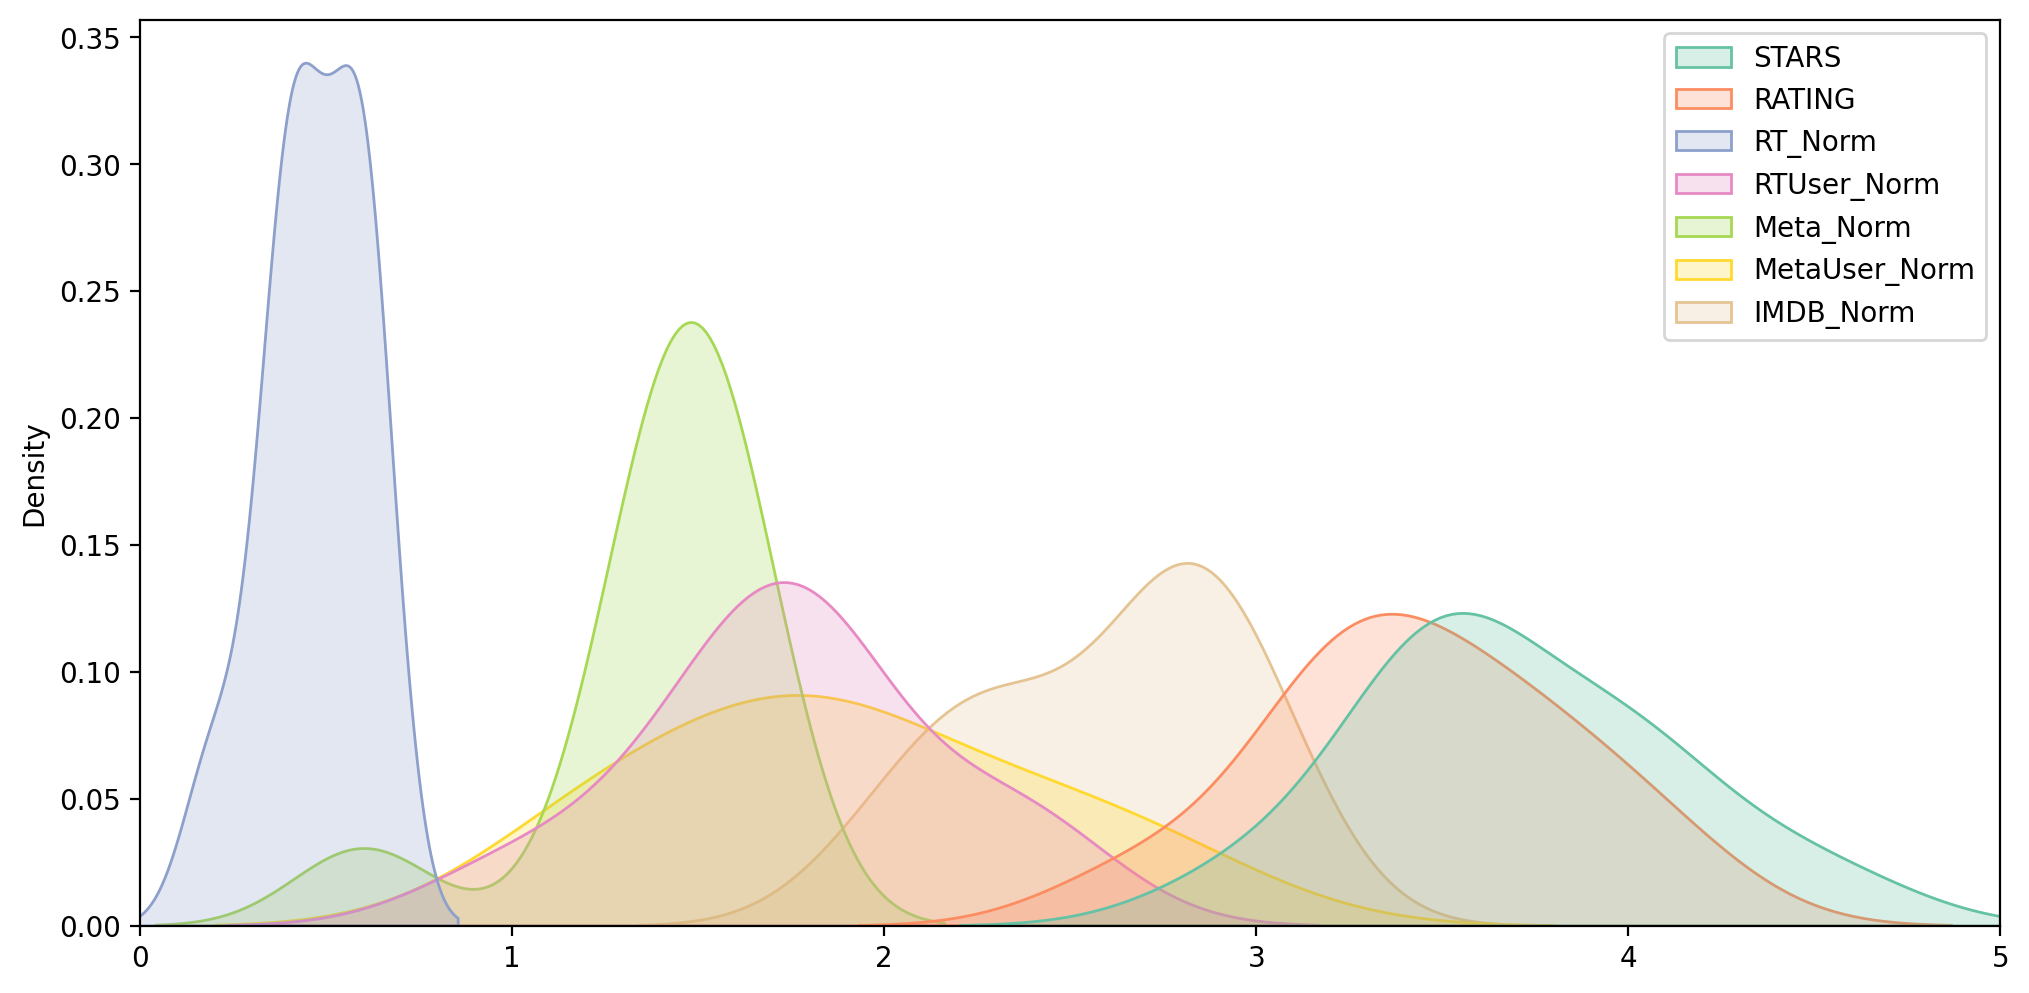

In [330]:
fig,ax = plt.subplots(figsize = (12,6), dpi = 200)
sns.kdeplot(data = worst_RT_Films, fill = True, palette = 'Set2')
plt.xlim(0,5)
move_legend(ax, "upper right")

## FINAL THOUGHTS

Fandango is showing around 3-4 star ratings for films that are clearly bad !
The biggest offender is Taken 3! Fandango is displaying 4.5 stars on their site for a film 
with an average rating of 1.86 across the other plateforms!